In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import h5py as h5

mpl.style.use('ggplot')

In [19]:
class read_python_hdf5:
    def __init__(self, _filepath, _nframes):
        self.filepath = _filepath
        self.nframes  = _nframes
    def __del__(self):
        self.f.close()
    def read_data_allFrame(self, data_name):
        with h5.File(self.filepath, mode='r') as f:
            data = np.array([f['/trajectory/frame_'+str(i)+data_name] for i in range(self.nframes)])
        return data
    def read_data_selectedFrame(self, data_name, step):
        with h5.File(self.filepath, mode='r') as f:
            data = np.array(f['/trajectory/frame_'+str(step)+data_name])
        return data

In [44]:
# read data
nframes     = 11
output_data = read_python_hdf5('./output.hdf5', nframes)
# particle data
pos         = output_data.read_data_allFrame('/R')
vel         = output_data.read_data_allFrame('/V')
f_h         = output_data.read_data_allFrame('/Force_h')
# field data (scalar)
epsilon     = output_data.read_data_allFrame('/epsilon')
potential   = output_data.read_data_allFrame('/electric_potential')
# field data (vector)
u           = output_data.read_data_allFrame('/u')
E           = output_data.read_data_allFrame('/electric_field')

Exception ignored in: <bound method read_python_hdf5.__del__ of <__main__.read_python_hdf5 object at 0x11838eba8>>
Traceback (most recent call last):
  File "<ipython-input-3-06e8be9e2fa7>", line 6, in __del__
AttributeError: 'read_python_hdf5' object has no attribute 'f'


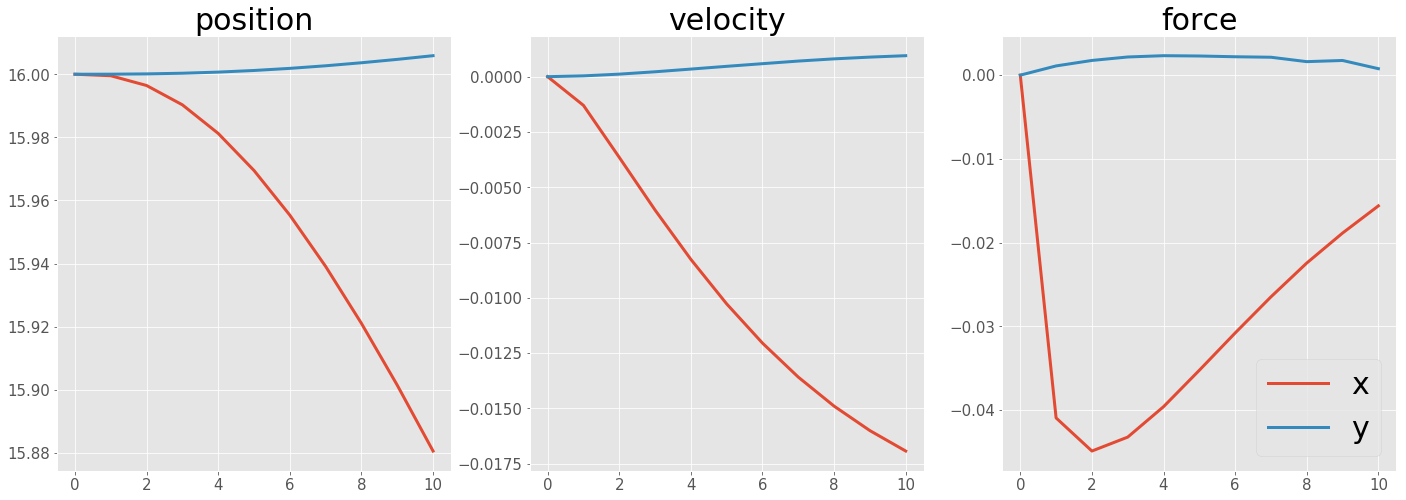

In [45]:
dim      = 2
name_xy  = ['x', 'y']
title    = ['position', 'velocity', 'force']
fontsize = 30

fig, [ax, bx, cx] = plt.subplots(figsize=(24,8), ncols=3)
for i, (xx, data) in enumerate(zip([ax,bx,cx], [pos, vel, f_h])):
    for j in range(dim):
        xx.plot(data[:,0,j], linewidth=3, label=name_xy[j])
    xx.tick_params(labelsize=fontsize/2)
    xx.set_title(title[i], fontsize=fontsize)
cx.legend(fontsize=fontsize)
plt.show()

In [56]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
def add_cbar(fig, ax, im, label="hoge"):
    div = make_axes_locatable(ax)
    cax = div.append_axes('right', size='5%', pad=0.2)
    cbar = fig.colorbar(im, cax=cax, orientation='vertical')
    if label != "hoge":
        cbar.set_label(label, size=26)
        
def plot_field_data(_vector, _scalar, _pos, label='hoge', step=-1, cmap=mpl.cm.bwr, vectorplot='vector', scale=10):
    fig, ax = plt.subplots(figsize=(8,8))
    # scalar plot and color bar
    im   = ax.pcolormesh(X, Y, _scalar[step], cmap=cmap, shading='gouraud')
    add_cbar(fig, ax, im, label=label)
    # vector plot
    if vectorplot=='vector':
        strm = ax.quiver(X, Y, _vector[step,0], _vector[step,1], color='gray', scale=scale)
    elif vectorplot=='stream':
        strm = ax.streamplot(x, y, np.transpose(_vector[step,0]), np.transpose(_vector[step,1]), color='gray', linewidth=2)
    # particle sirface
    c = plt.Circle((_pos[step,0,0], _pos[step,0,1]), 2.5, color='k', fill=False, lw=2, alpha=0.6)
    ax.add_artist(c)
    # others
    ax.set_xlim(x[0], x[-1])
    ax.set_xticks([x[0],x[-1]])
    ax.set_xticklabels(['0',r'$L_x$'])
    ax.set_ylim(y[0], y[-1])
    ax.set_yticks([y[-1]])
    ax.set_yticklabels([r'$L_y$'])
    ax.tick_params(labelsize=fontsize*2/3)
    ax.set_aspect('equal')
    plt.show()

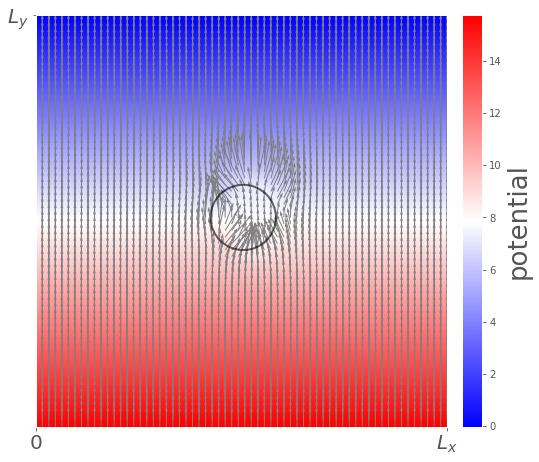

In [57]:
dx = .5
Np = 2**6
x = y = np.linspace(0, dx*Np, Np, endpoint=False)
X,Y = np.meshgrid(x, y, indexing='ij')
 
# electric field and potential
plot_field_data(E, potential, pos, label='potential')

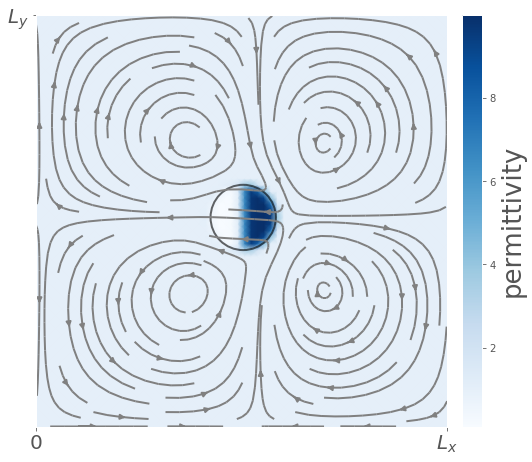

In [58]:
# fluid flow and permittivity
plot_field_data(u, epsilon, pos, label='permittivity', cmap=mpl.cm.Blues, vectorplot='stream')